## Observations and Insights 

-The treatments Capomulin and Ramicane have significantly lower mean Tumor Volume than all other treatments with both values being near 40 mm3, while all other treatments had mean values greater than 50 mm3. 
-All studies were done with nearly identical size trials with all but one running trials with 25 mice, and the other, Stelasyn, having one less at 24.
-The gender breakdown of all mice in the trials were very even with 49.8% female and 50.2% male subjects.
-At least for test subject "s185," the treatment Capomulin was effected dropping the tumor volume steadily and significantly over time.
-There is strong positive correlation between mouse weight and average tumor volume as the r-value is 0.84. 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results,on='Mouse ID')
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
len(mouse_study['Mouse ID'].unique())

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study[mouse_study.duplicated(subset=['Mouse ID','Timepoint'],keep='first')]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_study.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='first')
clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse['Mouse ID'].unique())

249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen = clean_mouse.groupby('Drug Regimen')
regimen_df = regimen.mean()
regimen_df = regimen_df[['Tumor Volume (mm3)']]
regimen_df = regimen_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Mean (mm3)'})
median_df = regimen.median()
median_df = median_df[['Tumor Volume (mm3)']]
median_df = median_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Median (mm3)'})
variance_df = regimen.var()
variance_df = variance_df[['Tumor Volume (mm3)']]
variance_df = variance_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})
std_df = regimen.std()
std_df = std_df[['Tumor Volume (mm3)']]
std_df = std_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume STD'})
sem_df = regimen.sem()
sem_df = sem_df[['Tumor Volume (mm3)']]
sem_df = sem_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume SEM'})
regimen_df = pd.merge(regimen_df,median_df,on='Drug Regimen')
regimen_df = pd.merge(regimen_df,variance_df,on='Drug Regimen')
regimen_df = pd.merge(regimen_df,std_df,on='Drug Regimen')
regimen_df = pd.merge(regimen_df,sem_df,on='Drug Regimen')
regimen_df

,Tumor Volume Mean (mm3),Tumor Volume Median (mm3),Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

## Bar and Pie Charts

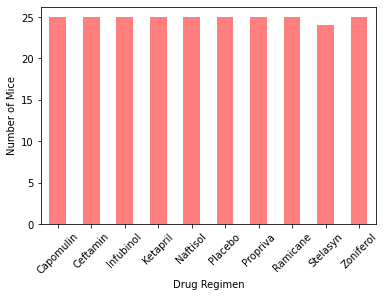

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count = clean_mouse.groupby('Drug Regimen')['Mouse ID'].nunique()
mouse_barpd = mouse_count.plot(kind='bar',color='red',alpha=0.5,rot=45)
mouse_barpd.set_ylabel('Number of Mice')
mouse_barpd
plt.show()

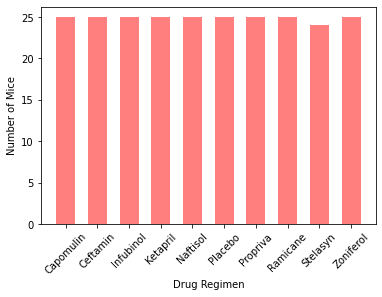

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mouse_count_df = pd.DataFrame(mouse_count)
mouse_count_df = mouse_count_df.reset_index()
x_axis = np.arange(len(mouse_count_df['Drug Regimen']))
plt.bar(x_axis,mouse_count_df['Mouse ID'],width=0.6,color='red',alpha=0.5,align='center')
plt.xticks(x_axis,mouse_count_df['Drug Regimen'],rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()

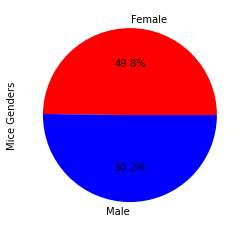

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_mouse.groupby('Sex')['Mouse ID'].nunique()
gender_countdf = pd.DataFrame(gender_count)
gender_countdf = gender_countdf.rename(columns={'Mouse ID':'Mice Genders'})
gender_piepd = gender_countdf.plot(kind='pie',y='Mice Genders',colors=['red','blue'],autopct='%1.1f%%',legend=False)
gender_piepd
plt.show()

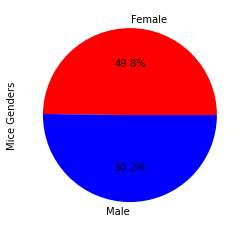

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_countdf = gender_countdf.reset_index()
plt.pie(gender_countdf['Mice Genders'],labels=gender_countdf['Sex'],colors=['red','blue'],autopct='%1.1f%%')
plt.ylabel('Mice Genders')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_volume = clean_mouse.groupby(['Drug Regimen','Mouse ID'])
drug_volumedf = drug_volume.max()
drug_volumedf = drug_volumedf.drop(['Ketapril','Naftisol','Placebo','Propriva','Stelasyn','Zoniferol'])
drug_volumedf = drug_volumedf[['Timepoint']]
drug_volumedf
# Start by getting the last (greatest) timepoint for each mouse
tumor_volume = clean_mouse[['Drug Regimen','Mouse ID','Timepoint','Tumor Volume (mm3)']]
final_volumedf = pd.merge(drug_volumedf,tumor_volume,how='left',on=['Drug Regimen','Mouse ID','Timepoint'])
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_volumedf

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_volumedf['Drug Regimen'].unique()
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
final_volumedf = final_volumedf.set_index('Drug Regimen')
for treatment in treatments:
    tum_vol = final_volumedf.loc[treatment,'Tumor Volume (mm3)']
    tumor_volume.append(tum_vol)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in range(0,4):
    quartiles = tumor_volume[x].quantile([.25,.5,.75])
    median = quartiles[0.5]
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(tumor_volume[x])
    print(f"Lower quartile: {lowerq}, Median: {median}, Upper quartile: {upperq}, IQR: {iqr}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 

    # Determine outliers using upper and lower bounds


Drug Regimen
Capomulin    38.982878
Capomulin    38.939633
Capomulin    30.485985
Capomulin    37.074024
Capomulin    40.159220
Capomulin    47.685963
Capomulin    37.311846
Capomulin    38.125164
Capomulin    38.753265
Capomulin    41.483008
Capomulin    38.846876
Capomulin    28.430964
Capomulin    33.329098
Capomulin    46.539206
Capomulin    32.377357
Capomulin    41.581521
Capomulin    23.343598
Capomulin    40.728578
Capomulin    34.455298
Capomulin    31.023923
Capomulin    40.658124
Capomulin    39.952347
Capomulin    36.041047
Capomulin    28.484033
Capomulin    31.896238
Name: Tumor Volume (mm3), dtype: float64
Lower quartile: 32.37735684, Median: 38.125164399999996, Upper quartile: 40.1592203, IQR: 7.781863460000004, Lower Bound: 20.70456164999999, Upper Bound: 51.83201549
Drug Regimen
Ceftamin    62.999356
Ceftamin    45.000000
Ceftamin    56.057749
Ceftamin    55.742829
Ceftamin    48.722078
Ceftamin    47.784682
Ceftamin    61.849023
Ceftamin    68.923185
Ceftamin    67.7

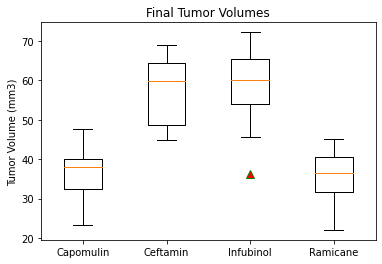

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Tumor Volume (mm3)')
flierprops = dict(marker='^', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')
ax1.boxplot(tumor_volume,flierprops=flierprops)
plt.xticks(np.arange(len(treatments))+1,treatments)
plt.show()

## Line and Scatter Plots

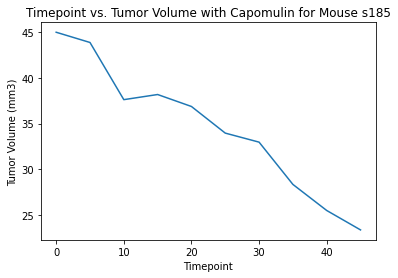

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = clean_mouse.loc[(clean_mouse['Drug Regimen'] == 'Capomulin')]
mouse_df = cap_df.loc[cap_df['Mouse ID'] == 's185']
timepoint = mouse_df['Timepoint']
tumor_vol = mouse_df['Tumor Volume (mm3)']
plt.plot(timepoint, tumor_vol)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Timepoint vs. Tumor Volume with Capomulin for Mouse s185')
plt.show()

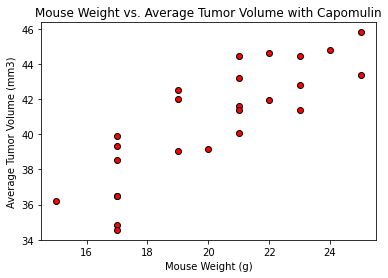

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_weight = cap_df.groupby('Mouse ID').mean()
mouse_weight = average_weight['Weight (g)']
avg_tumor = average_weight['Tumor Volume (mm3)']
plt.scatter(mouse_weight, avg_tumor, marker="o", facecolors="red", edgecolors="black")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume with Capomulin')
plt.show()

## Correlation and Regression

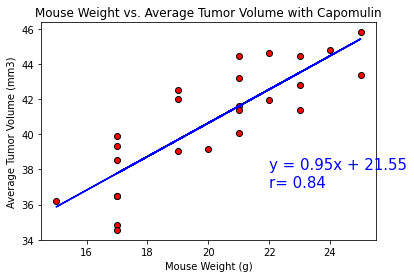

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor)
regress_values = mouse_weight * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(mouse_weight, avg_tumor, marker="o", facecolors="red", edgecolors="black")
plt.plot(mouse_weight,regress_values,"b")
plt.annotate(line_eq,(22,38),fontsize=15,color="blue")
plt.annotate(f"r= {round(rvalue,2)}",(22,37),fontsize=15,color="blue")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume with Capomulin')
plt.show()